In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import prepare_data
import warnings
warnings.filterwarnings("ignore")

# get yearly and monthly data
df_av_yearly, df_av_monthly = prepare_data.prepare_data()

# individual regression
type = "temp_max"
year = 2050 - 1984

# prepare x and y
y = df_av_monthly[type].values
x = pd.DataFrame(np.arange(0,len(y))).values


score:  0.009180264151738338


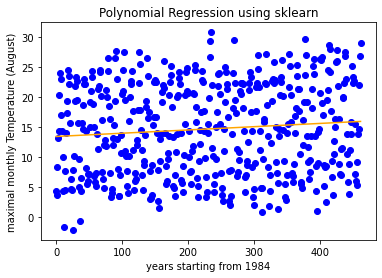

In 2050 it will have (on average): 13.491479009868193 degrees celcius
That is a temperature rise of 0.44810365453511025 degrees celcius


In [21]:
"""polynomial regression using sklearn"""

from sklearn.preprocessing import PolynomialFeatures 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 1,include_bias=False)
X_poly = pd.DataFrame(poly.fit_transform(x))
lin2 = LinearRegression()

# preprocessing data is necessary
#scaler = preprocessing.StandardScaler()
#X_poly = scaler.fit_transform(X_poly)

lin2.fit(X_poly, y)
print("score: ", lin2.score(X_poly,y))

# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'blue')
#plt.plot(x, y, color = 'blue')
plt.plot(x, lin2.predict(X_poly), color = 'orange')
plt.title('Polynomial Regression using sklearn')
plt.xlabel('years starting from 1984')
plt.ylabel('maximal monthly Temperature (August)')
plt.show()


# make predictions
print(f"In {year+1984} it will have (on average): {lin2.predict(poly.fit_transform(np.array([mean]).reshape(-1,1)))[0]} degrees celcius")
print(f"That is a temperature rise of {(lin2.predict(poly.fit_transform(np.array([mean]).reshape(-1,1)))[0]-y[0:12].mean())} degrees celcius")

score: 0.00918026415173835


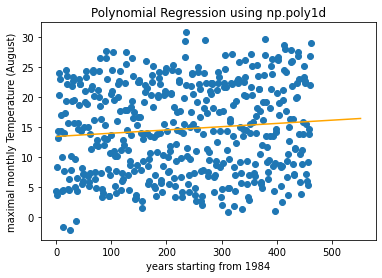

In 2050 it will have (on average): 13.491479009868192 degrees celcius
That is a temperature rise of 0.4481036545351085 degrees celcius


In [16]:
""" Polynomial Regression using numpy polyfit1d"""

mymodel = np.poly1d(np.polyfit(np.array(np.arange(0,len(y))), y, 1))

#calculate r-squared
yhat = mymodel(x)
ybar = np.sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((y - ybar)**2)
r_squared = ssreg / sstot
print('score:', r_squared)

myline = np.linspace(1,46*12, 150)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline), color = 'orange')
plt.title('Polynomial Regression using np.poly1d')
plt.xlabel('years starting from 1984')
plt.ylabel('maximal monthly Temperature (August)')
plt.show() 
mean = mymodel(np.arange((year*12)-12, year*12)).mean()
# make predictions
poly_fit = np.poly1d(mymodel((year, 10)))
print(f"In {year+1984} it will have (on average): {mymodel(mean)} degrees celcius")
print(f"That is a temperature rise of {mymodel(mean)-(y[0:12]).mean()} degrees celcius")